In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data/var_9.csv").drop('Unnamed: 0', axis=1)

In [3]:
import scipy.stats as stats

def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [4]:
resumetable(data)

Dataset Shape: (384, 6)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,0,float64,0,384,36.748362,32.958534,76.445701,8.58
1,1,float64,0,384,0.246186,0.109565,0.479909,8.58
2,2,float64,0,384,0.280033,0.010475,0.484919,8.58
3,3,float64,0,2,0.000000,1.000000,0.000000,0.97
4,4,float64,0,384,18.200903,22.138304,18.923142,8.58
5,5,float64,0,384,67.464534,85.213167,78.323485,8.58


Все значения, кроме 3, непрерывные, 3 - бинарная 

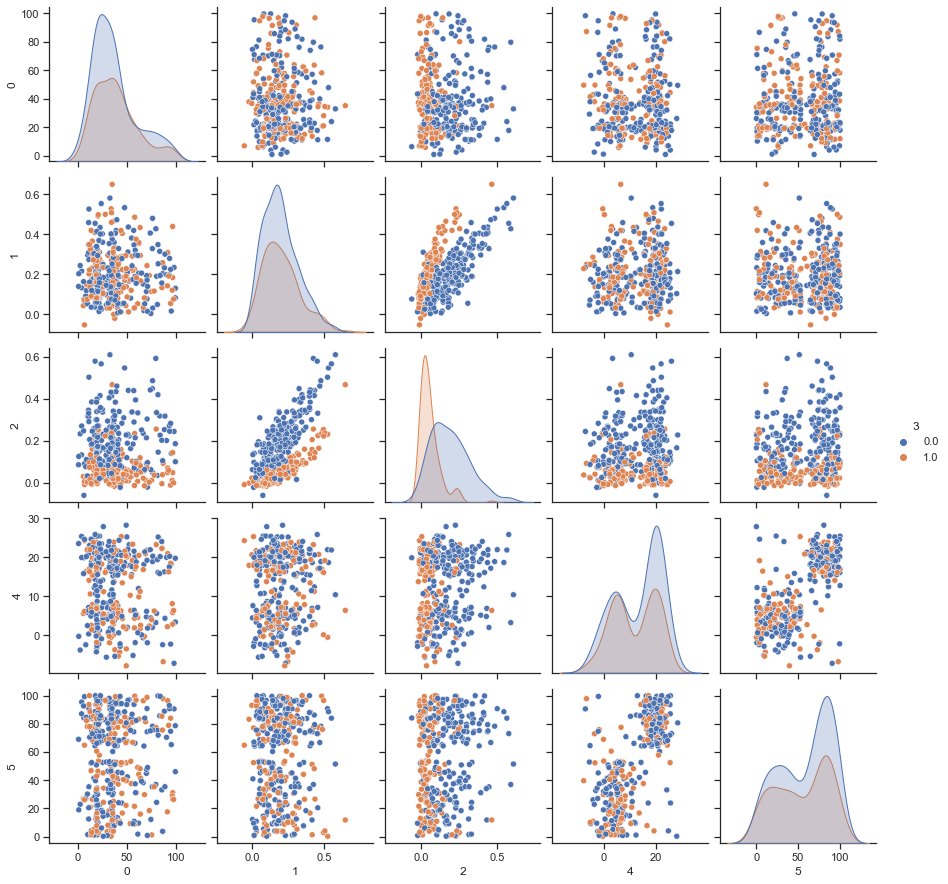

In [5]:
import seaborn as sns
sns.set_theme(style="ticks")

# Densities and scatter plots according to third value
sns.pairplot(data, hue="3");

Видно, что 1 и 2 признак имеют ярко выраженную линейную зависимость при различных значениях 3 признака. Посмотрим на матрицу корреляций.

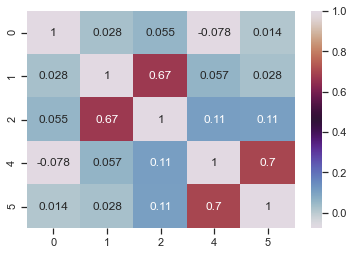

In [6]:
sns.heatmap(data.drop("3", axis=1).corr(), annot = True, cmap= 'twilight');

In [7]:
data.describe()

,0,1,2,3,4,5
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,37.790057,0.199291,0.138825,0.401042,12.548879,57.185452
std,22.489391,0.123746,0.128194,0.490749,8.754768,30.975765
min,0.983589,-0.054014,-0.060307,0.000000,-7.794053,0.267589
25%,20.269376,0.104939,0.036660,0.000000,4.938260,29.745165
50%,34.264751,0.184584,0.102275,0.000000,15.703722,66.928699
75%,48.355567,0.278253,0.220400,1.000000,20.328082,84.048018
max,99.727631,0.650186,0.608394,1.000000,28.253891,99.960225


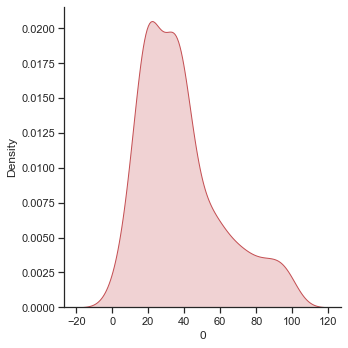

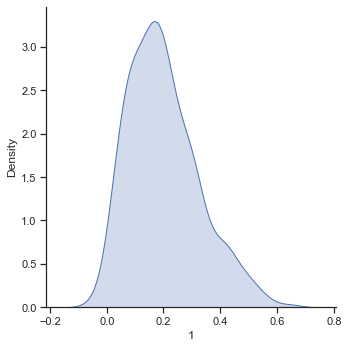

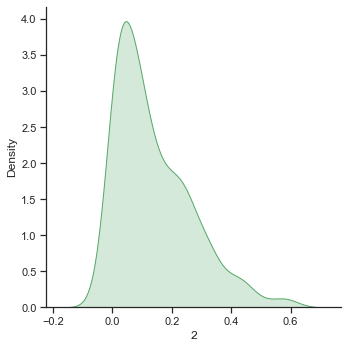

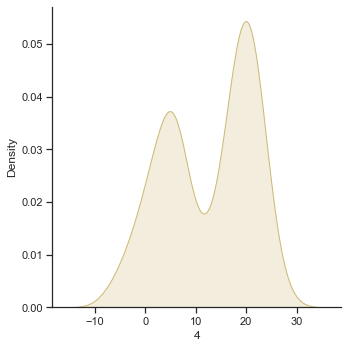

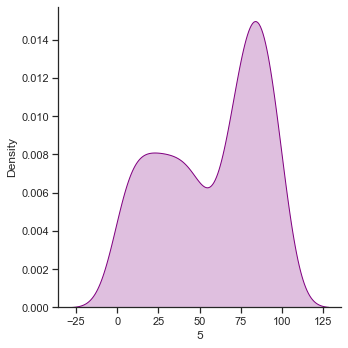

In [8]:
sns.set_theme(style="ticks")
for i, color in zip([0, 1, 2, 4, 5], ["r", "b", "g", "y", "purple"]):
    sns.displot(data, x=str(i), kind="kde",  fill=True, color=color);

Заметим, что 4 и 5ый признак имеют 2 класстера и большую корреляцию.


In [9]:
data_45 = data.loc[:, ("4", "5")]
data_45.insert(2, "5th feature < 52", data_45["5"] < 52)
data_45.insert(3, "4th feature < 12", data_45["4"] < 12)

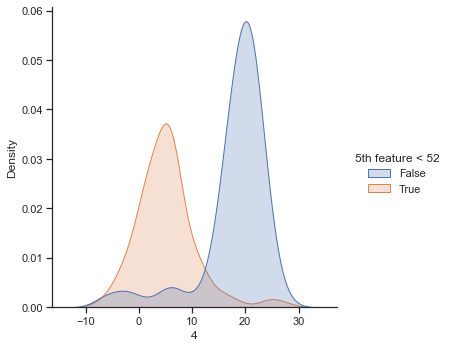

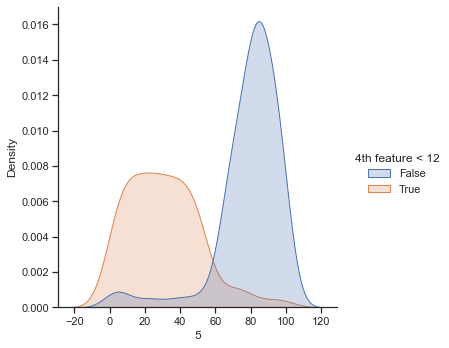

In [10]:
sns.displot(data_45, x="4",hue="5th feature < 52", kind="kde",  fill=True, color=color);
sns.displot(data_45, x="5",hue="4th feature < 12", kind="kde",  fill=True, color=color);

Мы видим, что если наблюдение попала в левый кластер для 5ой фичи, то она с большой вероятностью попадет в левый кластер для 4ой. 

Иннокентий, в твоих даннных я обнаружил 2 особенности. Во-первых, вторая характеристика имеет  зависимость при разных занчений 3ий характеристики. Рассмотри подробнее эту взаимосвязь. Во-вторых, так же тестно связанны фичи 4 и 5. Они образуют 2 кластера. Возможно, объекты в выборке образуют 2 группы и ты можешь попытаться понять по какому признаку они различаются. 